### $$ Analystes :\;\;\;\;\;\;\;\;\;\;\; Jeff \; Lwear \; DUVERSEAU \;et \;Lionel \;PETIOTE$$

# Project Title :

# **$$\ Credit\ Card \ Fraud\ Detection\ Using\ Supervised\ Machine\ Learning \ $$**

# 1. Overview

#### Ce projet vise à concevoir un modèle prédictif capable d’identifier les transactions frauduleuses effectuées par carte de crédit à l’aide de techniques d’apprentissage supervisé. Le jeu de données comprend plus d’un million de transactions issues de cartes authentiques et compromises, chacune contenant un historique détaillé. L’objectif est de mettre en place un système de classification performant permettant de détecter en temps quasi réel les anomalies et de réduire les pertes financières associées à la fraude.

#### Ce projet se positionne ainsi comme une étape clé vers la mise en œuvre de solutions intelligentes de cybersécurité financière.

## 1.1. Business Understanding

#### La fraude par carte de crédit représente un défi majeur pour les institutions financières, tant sur le plan économique que réputationnel. Elle se caractérise par une faible proportion de cas frauduleux et par l’évolution constante des méthodes de fraude, ce qui complique leur détection. Ce projet s’inscrit dans une démarche d’aide à la décision visant à automatiser la détection de comportements suspects grâce à l’analyse de données transactionnelles et à l’intelligence artificielle.

#### Dans cette optique, les objectifs ci-dessous ont été définis pour orienter le processus analytique.

 ## 1.2. Objectifs
 
 ### 1.2.1. Objectif général
 
#### Développer un modèle d’apprentissage supervisé capable de prédire avec précision le caractère frauduleux ou non d’une transaction par carte de crédit à partir des données historiques.

### 1.2.2. Objectifs spécifiques

#### Identifier et sélectionner les variables les plus discriminantes permettant de différencier les comportements normaux des comportements suspects.

#### Entraîner, tester et comparer plusieurs modèles de classification afin de retenir celui offrant la meilleure performance pour la détection de fraude.

## 2. Importations
## 2.1. Importation des bibliothèques

In [1]:
# Manipulation des données
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Gestion des avertissements
import warnings
warnings.filterwarnings('ignore')

# Options d’affichage
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 120)

## 2.1. Importation des données

In [2]:
# Fichiers de cartes authentiques
gdc1 = pd.read_csv("IDXDataset_gdc01.csv")
gdc2 = pd.read_csv("IDXDataset_gdc02.csv")
gdc3 = pd.read_csv("IDXDataset_gdc03.csv")

# Fichier des cartes compromises
wpc = pd.read_csv("IDXDataset_wpc.csv")

# Vérification rapide
print("Données importées avec succès !")
print(f"gdc1 : {gdc1.shape}")
print(f"gdc2 : {gdc2.shape}")
print(f"gdc3 : {gdc3.shape}")
print(f"wpc  : {wpc.shape}")

Données importées avec succès !
gdc1 : (350000, 8)
gdc2 : (350000, 8)
gdc3 : (348575, 8)
wpc  : (318242, 7)


In [3]:
# Aperçu détaillés des différents fichiers
print("La structure de la table gdc1 est la suivante :")
gdc1.head()

La structure de la table gdc1 est la suivante :


,Unnamed: 0,SEQ,Trans_Calendar_Date,Local_Transaction_Time,CD_TYPE,dollar_amt,CTR,CASE_ID
0,1,41,24-Mar-18,15:54:06,GDC,44.20,1,0
1,2,40,26-Mar-18,11:06:31,GDC,57.78,2,0
2,3,39,27-Mar-18,13:03:02,GDC,37.30,3,0
3,4,38,4-Apr-18,13:35:02,GDC,88.32,4,0
4,5,37,4-Apr-18,18:53:21,GDC,46.74,5,0


In [4]:
# Aperçu détaillés des différents fichiers
print("La structure de la table gdc2 est la suivante :")
gdc2.head()

La structure de la table gdc2 est la suivante :


,Unnamed: 0,SEQ,Trans_Calendar_Date,Local_Transaction_Time,CD_TYPE,dollar_amt,CTR,CASE_ID
0,350001,17,29-May-18,14:08:24,GDC,49.29,350001,8536
1,350002,16,1-Jun-18,11:19:27,GDC,67.67,350002,8536
2,350003,15,6-Jun-18,5:53:43,GDC,57.85,350003,8536
3,350004,14,9-Jun-18,6:37:50,GDC,51.09,350004,8536
4,350005,13,13-Jun-18,5:22:14,GDC,47.16,350005,8536


In [5]:
# Aperçu détaillés des différents fichiers
print("La structure de la table gdc3 est la suivante :")
gdc3.head()

La structure de la table gdc3 est la suivante :


,Unnamed: 0,SEQ,Trans_Calendar_Date,Local_Transaction_Time,CD_TYPE,dollar_amt,CTR,CASE_ID
0,700001,34,7-Dec-17,11:11:10,GDC,34.15,700001,17073
1,700002,33,15-Dec-17,15:48:05,GDC,33.00,700002,17073
2,700003,32,27-Dec-17,9:40:44,GDC,33.48,700003,17073
3,700004,31,5-Jan-18,12:59:46,GDC,35.41,700004,17073
4,700005,30,15-Jan-18,18:23:28,GDC,38.46,700005,17073


In [6]:
# Aperçu détaillés des différents fichiers
print("La structure de la table wpc est la suivante :")
wpc.head()

La structure de la table wpc est la suivante :


,SEQ,Trans_Calendar_Date,Local_Transaction_Time,CASE_ID,WP_YN,CD_TYPE,dollar_amt
0,41,25-Apr-17,6:27:00,176765465.0,0,WPC,57.01
1,40,26-Apr-17,17:07:00,176765465.0,0,WPC,57.81
2,39,28-Apr-17,5:05:00,176765465.0,0,WPC,39.95
3,38,1-May-17,7:43:37,176765465.0,0,WPC,58.18
4,37,2-May-17,15:09:06,176765465.0,0,WPC,58.35


### $Commentaire$

#### Compréhension des données

Les fichiers `gdc1`, `gdc2` et `gdc3` contiennent des transactions légitimes effectuées à partir de **25 575 cartes de crédit**, chacune enregistrant **41 transactions** (soit environ 1 048 575 lignes). Chaque carte est identifiée par un `CASE_ID` unique répété 41 fois, et les transactions sont ordonnées selon la séquence `SEQ` (de 41 à 1). Les colonnes `CTR` et `Unnamed:0` ne sont que des identifiants techniques sans utilité analytique.

Le fichier `wpc` regroupe **7 762 cartes compromises**, également dotées de 41 transactions chacune (≈ 318 242 lignes). Contrairement aux fichiers GDC, il inclut une colonne `WP_YN` qui précise la nature de la transaction : **1 pour une transaction frauduleuse (toujours la plus récente, SEQ=1)** et 0 sinon. L’ordre de ses colonnes diffère légèrement, mais la structure reste compatible.

## Fusion des fichiers `gdc1`, `gdc2` et `gdc3`
Les fichiers `gdc1`, `gdc2` et `gdc3` présentent la même structure et peuvent du coup se fusionner sans difficulté.

In [7]:
# Fusion initiale
Data_card = pd.concat([gdc1, gdc2, gdc3], ignore_index=True)
Data_card.shape

(1048575, 8)

## Suppression des colonnes Unnamed.0 et CTR
Les colonnes Unnamed.0 et CTR donnent la même information, il s'agit d'un indentifiant de transaction et du coup ne présentent pas de réelle utilité analytique. Donc, on peut se permettre de les supprimer.

In [8]:
# Suppression des colonnes Unnamed:0 et CTR
Data_card = Data_card.drop(['Unnamed: 0', 'CTR'], axis=1)

In [9]:
# Comparer les colonnes entre les DataFrames
print("Colonnes gdc1:", set(Data_card.columns))
print("Colonnes wpc :", set(wpc.columns))

# Colonnes manquantes ou différentes
print("\nColonnes manquantes dans wpc :", set(Data_card.columns) - set(wpc.columns))
print("Colonnes supplémentaires dans wpc :", set(wpc.columns) - set(Data_card.columns))

Colonnes gdc1: {'Local_Transaction_Time', 'CASE_ID', 'CD_TYPE', 'SEQ', 'Trans_Calendar_Date', 'dollar_amt'}
Colonnes wpc : {'Local_Transaction_Time', 'CASE_ID', 'WP_YN', 'CD_TYPE', 'SEQ', 'Trans_Calendar_Date', 'dollar_amt'}

Colonnes manquantes dans wpc : set()
Colonnes supplémentaires dans wpc : {'WP_YN'}


In [10]:
# Harmoniser les colonnes
common_cols = [col for col in Data_card.columns if col in wpc.columns]
wpc = wpc[common_cols + ['WP_YN']] if 'WP_YN' in wpc.columns else wpc[common_cols]

# Création de la variable cible 'fraude'
wpc['fraude'] = wpc['WP_YN'].apply(lambda x: 1 if x == 1 else 0)
Data_card['fraude'] = 0

# Supprimer la colonne WP_YN
wpc_clean = wpc.drop(columns=['WP_YN'], errors='ignore')

# Fusion globale
Data_card_complete = pd.concat([Data_card, wpc_clean], ignore_index=True)

# Vérifications de cohérence
print("Dimensions :", Data_card_complete.shape)
print("Répartition des classes :")
print(Data_card_complete['fraude'].value_counts())
print("\nAperçu :")
Data_card_complete.head()

Dimensions : (1366817, 7)
Répartition des classes :
fraude
0    1359055
1       7762
Name: count, dtype: int64

Aperçu :


,SEQ,Trans_Calendar_Date,Local_Transaction_Time,CD_TYPE,dollar_amt,CASE_ID,fraude
0,41,24-Mar-18,15:54:06,GDC,44.20,0.0,0
1,40,26-Mar-18,11:06:31,GDC,57.78,0.0,0
2,39,27-Mar-18,13:03:02,GDC,37.30,0.0,0
3,38,4-Apr-18,13:35:02,GDC,88.32,0.0,0
4,37,4-Apr-18,18:53:21,GDC,46.74,0.0,0


# 3. Exploratory Data Analysis

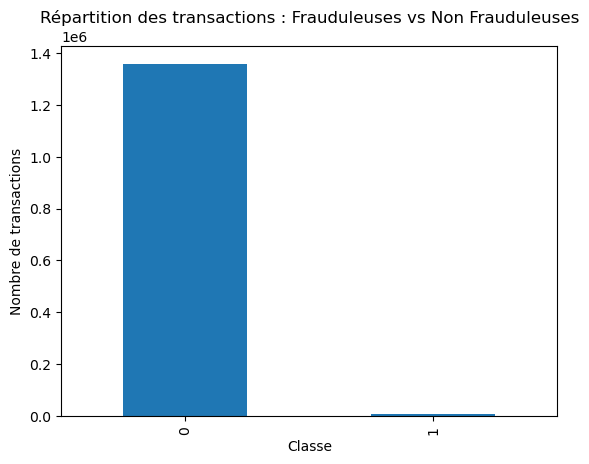

Taux de fraude dans le dataset : 0.57%


In [11]:
# Distribution des classes (fraude vs non fraude)
Data_card_complete['fraude'].value_counts().plot(kind='bar')
plt.title("Répartition des transactions : Frauduleuses vs Non Frauduleuses")
plt.xlabel("Classe")
plt.ylabel("Nombre de transactions")
plt.show()

# Affichage du pourcentage de transactions frauduleuses
fraud_ratio = Data_card_complete['fraude'].mean() * 100
print(f"Taux de fraude dans le dataset : {fraud_ratio:.2f}%")

 ### $Commentaire$

Le taux global de fraude observé dans le jeu de données est particulièrement faible, avoisinant 0,57 %. Cette faible proportion traduit une forte prédominance des transactions légitimes, ce qui est généralement le cas dans les systèmes de paiement réels où les fraudes représentent une minorité marginale des opérations totales.

Cependant, cette déséquilibre marqué entre classes (transactions frauduleuses vs non frauduleuses) constitue un défi majeur pour la modélisation : les algorithmes d’apprentissage risquent de favoriser la classe majoritaire, en négligeant les cas rares mais cruciaux de fraude.

**Ainsi, il sera nécessaire d’adopter des stratégies spécifiques de gestion du déséquilibre des classes, telles que** :

- la rééchantillonnage (oversampling ou undersampling),
- l’utilisation de poids de classes ajustés,
- ou encore le recours à des modèles robustes face aux données déséquilibrées.

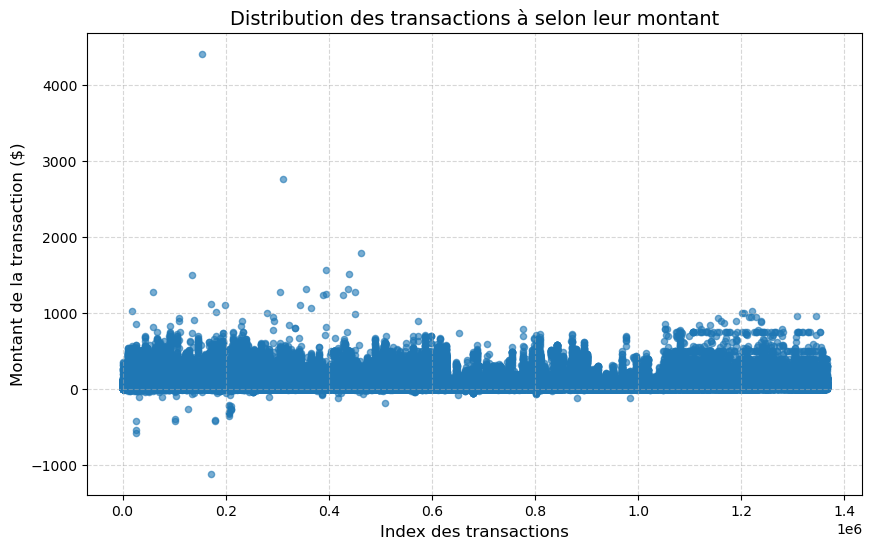

,count,mean,std,min,25%,50%,75%,max
fraude,,,,,,,,
0,1359055.0,53.640954,42.268213,-1116.91,31.420,46.01,64.59,4413.61
1,7762.0,172.561364,116.865552,0.03,124.485,150.00,200.00,1020.49


In [12]:
plt.figure(figsize=(10,6))
plt.scatter(
    x=Data_card_complete.index, 
    y=Data_card_complete['dollar_amt'], 
    alpha=0.6, 
    s=20
)

# Mise en forme du graphique
plt.title("Distribution des transactions à selon leur montant", fontsize=14)
plt.xlabel("Index des transactions", fontsize=12)
plt.ylabel("Montant de la transaction ($)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

# Comparaison des montants frauduleux vs non frauduleux
Data_card_complete.groupby('fraude')['dollar_amt'].describe()

 ### $Commentaire$

- La grande majorité des transactions se concentrent dans une bande dense autour de zéro, ce qui indique que la plupart des opérations ont des montants relativement faibles, probablement inférieurs à quelques centaines de dollars. Cette zone compacte traduit la normalité des comportements financiers courants.

- Cependant, on observe la présence de plusieurs points isolés, s’élevant au-dessus ou en dessous du nuage principal. Ces points représentent des valeurs extrêmes ou atypiques, aussi bien pour des montants élevés positifs (au-delà de 2 000 à 4 000 dollars) que pour quelques valeurs négatives (avoisinant -1 000 dollars).

In [13]:
# Aperçu général des données
Data_card_complete.info()

# Aperçu statistique des variables numériques
Data_card_complete['dollar_amt'].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1366817 entries, 0 to 1366816
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SEQ                     1366817 non-null  int64  
 1   Trans_Calendar_Date     1366817 non-null  object 
 2   Local_Transaction_Time  1366817 non-null  object 
 3   CD_TYPE                 1366817 non-null  object 
 4   dollar_amt              1366817 non-null  float64
 5   CASE_ID                 1362740 non-null  float64
 6   fraude                  1366817 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 73.0+ MB


count    1.366817e+06
mean     5.431629e+01
std      4.397568e+01
min     -1.116910e+03
25%      3.150000e+01
50%      4.618000e+01
75%      6.500000e+01
max      4.413610e+03
Name: dollar_amt, dtype: float64

 ### $Commentaire$

- **Valeurs manquantes**

Le jeu de données présente une excellente complétude globale, avec un taux de valeurs manquantes quasi nul. Les rares valeurs manquantes observées concernent exclusivement la colonne `CASE_ID`, qui sert d’identifiant unique pour les cartes de crédit.
Ces absences peuvent être dues à des anomalies lors de la collecte ou à des transactions isolées n’ayant pas pu être reliées à une carte spécifique. Bien que leur proportion soit négligeable, elles nécessitent une vérification, car la présence d’un identifiant manquant empêche d’associer correctement les transactions à un titulaire de carte. Selon l’ampleur du phénomène, ces enregistrements pourront être supprimés ou imputés de manière cohérente avant l’étape de modélisation.

- **Montants négatifs**

L’analyse descriptive du champ `dollar_amt` révèle un montant minimal de -1 116,91 dollars, indiquant la présence de valeurs négatives dans le jeu de données.
Ces montants négatifs peuvent correspondre à des transactions de remboursement, d’ajustement de solde ou d’annulation d’achat, courantes dans le traitement des opérations financières.
Toutefois, comme le contexte d’étude se limite à la détection de fraudes sur les paiements sortants, ces valeurs pourraient être considérées comme non pertinentes et donc exclues. Une exploration plus approfondie permettra de déterminer s’il s’agit de comportements légitimes ou d’erreurs de saisie.

In [14]:
# Vérifier les valeurs négatives dans la colonne dollar_amt
negatives = Data_card_complete[Data_card_complete['dollar_amt'] < 0]
print(f"Nombre de transactions à montant négatif : {len(negatives)}")
negatives.head()

Nombre de transactions à montant négatif : 5795


,SEQ,Trans_Calendar_Date,Local_Transaction_Time,CD_TYPE,dollar_amt,CASE_ID,fraude
702,36,10-Jul-18,10:29:44,GDC,-2.36,17.0,0
704,34,12-Jul-18,11:01:27,GDC,-2.20,17.0,0
707,31,14-Jul-18,11:24:10,GDC,-1.24,17.0,0
709,29,14-Jul-18,19:38:43,GDC,-2.18,17.0,0
712,26,17-Jul-18,12:36:07,GDC,-2.16,17.0,0


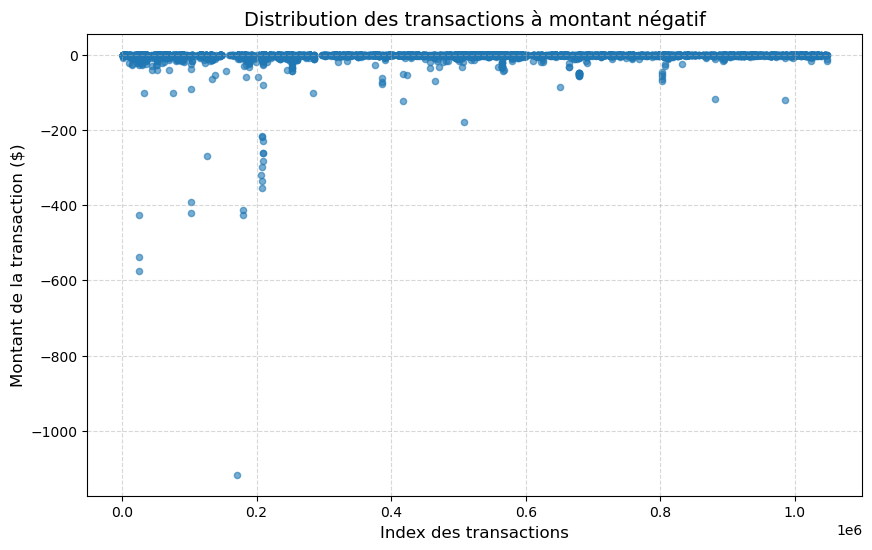

In [15]:
# Création du graphique
plt.figure(figsize=(10,6))
plt.scatter(
    x=negatives.index, 
    y=negatives['dollar_amt'], 
    alpha=0.6, 
    s=20
)

# Mise en forme du graphique
plt.title("Distribution des transactions à montant négatif", fontsize=14)
plt.xlabel("Index des transactions", fontsize=12)
plt.ylabel("Montant de la transaction ($)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

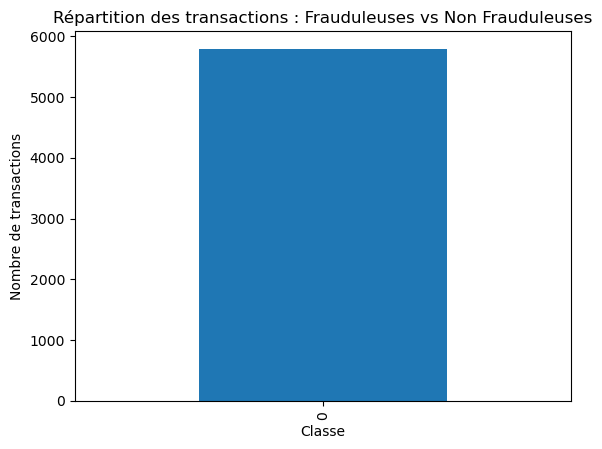

Taux de fraude dans les transactions à montant négatif : 0.00%


In [16]:
# Distribution des classes (fraude vs non fraude)
negatives['fraude'].value_counts().plot(kind='bar')
plt.title("Répartition des transactions : Frauduleuses vs Non Frauduleuses")
plt.xlabel("Classe")
plt.ylabel("Nombre de transactions")
plt.show()

# Affichage du pourcentage de transactions frauduleuses
fraud_ratio = negatives['fraude'].mean() * 100
print(f"Taux de fraude dans les transactions à montant négatif : {fraud_ratio:.2f}%")

 ### $Commentaire$

La majorité des valeurs négatives observées se situent très près de zéro, à l’exception de quelques montants isolés présentant un écart plus marqué.

Étant donné que le présent projet porte sur la détection de fraudes, et que les transactions à montants négatifs correspondent généralement à des remboursements ou des annulations d’opérations, il est peu probable qu’elles soient pertinentes dans ce contexte d’analyse.

Par ailleurs, aucune de ces transactions n’a été identifiée comme frauduleuse, ce qui renforce l’idée qu’elles peuvent être exclues sans incidence sur la qualité du modèle

In [16]:
# Nombre et pourcentage de transactions sans identifiant de carte
no_id = Data_card_complete[Data_card_complete['CASE_ID'].isnull()]
nb_missing_caseid = len(no_id)
pct_missing_caseid = (nb_missing_caseid / len(Data_card_complete)) * 100

print(f"\nNombre de transactions sans ID : {nb_missing_caseid}")
print(f"Pourcentage de transactions sans ID : {pct_missing_caseid:.3f}%")


Nombre de transactions sans ID : 4077
Pourcentage de transactions sans ID : 0.298%


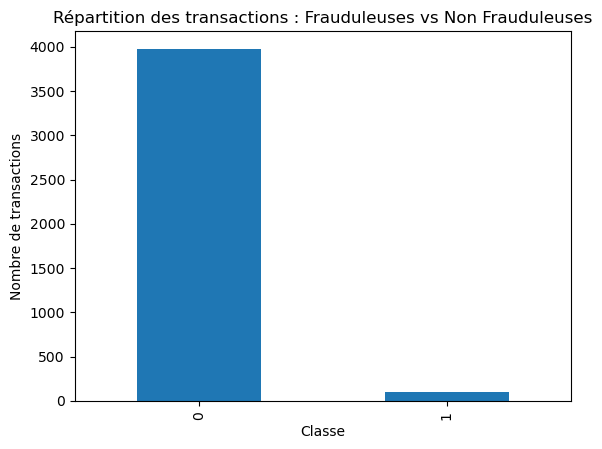

Taux de fraude des transactions non-identifiées : 2.48%


In [17]:
# Distribution des classes (fraude vs non fraude)
no_id['fraude'].value_counts().plot(kind='bar')
plt.title("Répartition des transactions : Frauduleuses vs Non Frauduleuses")
plt.xlabel("Classe")
plt.ylabel("Nombre de transactions")
plt.show()

# Affichage du pourcentage de transactions frauduleuses
fraud_ratio = no_id['fraude'].mean() * 100
print(f"Taux de fraude des transactions non-identifiées : {fraud_ratio:.2f}%")

### $Commentaire$
Les transactions non identifiées représentent environ 0,3 % de l’ensemble du jeu de données, soit 4 077 cas. Bien que leur proportion soit marginale, leur présence mérite une attention particulière, car elles traduisent une absence d’information clé (CASE_ID) susceptible de compliquer le suivi ou la traçabilité des opérations.

Par ailleurs, 2,48 % de ces transactions anonymes sont signalées comme frauduleuses, un taux nettement supérieur à la moyenne globale de 0,57 %. Cette surreprésentation laisse penser que l’anonymat pourrait constituer un facteur de risque accru de fraude, ou du moins un indicateur d’irrégularité dans la collecte ou la saisie des données.

Il serait donc pertinent d’approfondir l’analyse de ces cas afin de déterminer s’ils résultent d’un défaut technique de saisie, d’un masquage volontaire, ou d’une tentative de dissimulation d’activité frauduleuse.

## Analyser la distribution des valeurs des transactions et l’heure de chaque transaction pour les situations normales et frauduleuses

In [18]:
# Copie du dataframe pour éviter de modifier l'original
df = Data_card_complete.copy()

In [19]:
# Conversion de la colonne d'heure en format datetime
df['Local_Transaction_Time'] = pd.to_datetime(df['Local_Transaction_Time'], format='%H:%M:%S', errors='coerce')
# Extraire l'heure sous forme numérique (0 à 23)
df['hour'] = df['Local_Transaction_Time'].dt.hour

# Vérification rapide
print(df[['dollar_amt', 'hour', 'fraude']].head())

   dollar_amt  hour  fraude
0       44.20    15       0
1       57.78    11       0
2       37.30    13       0
3       88.32    13       0
4       46.74    18       0


# Distribution horaire des transactions

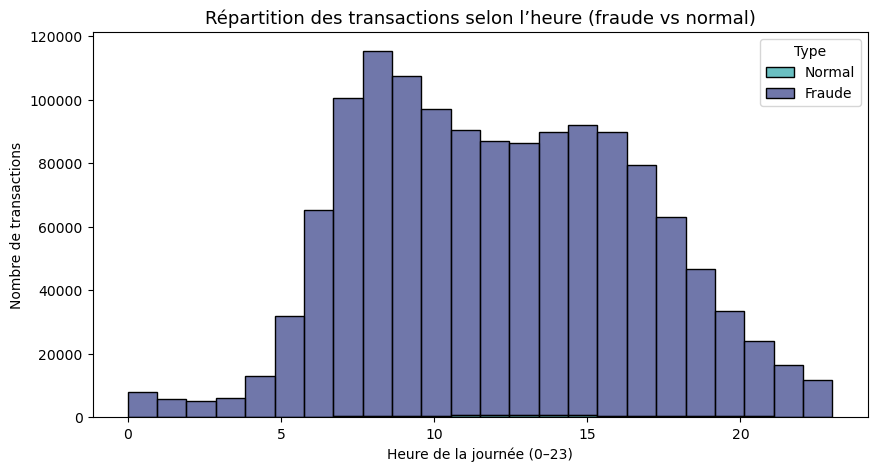

In [20]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='hour', hue='fraude', bins=24, multiple='stack', palette='mako')
plt.title("Répartition des transactions selon l’heure (fraude vs normal)", fontsize=13)
plt.xlabel("Heure de la journée (0–23)")
plt.ylabel("Nombre de transactions")
plt.legend(title='Type', labels=['Normal', 'Fraude'])
plt.show()

# Commentaire
les transactions frauduleuses sont quasiment invisibles sur le graphique.
Cela est dû à un déséquilibre massif des classes : à peine 0.57 % de fraudes sur l’ensemble du dataset. Du coup, nous aloons afficher chaque distribution separement.

# Distribution horaire des transactions FRAUDULEUSES 

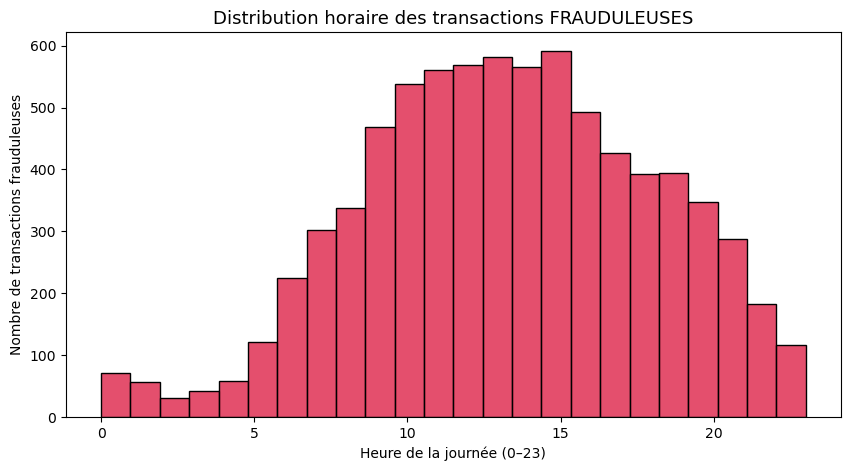


📈 Nombre de fraudes par heure de la journée :
hour
0      72
1      57
2      31
3      43
4      59
5     122
6     224
7     302
8     338
9     468
10    538
11    561
12    568
13    581
14    566
15    592
16    493
17    427
18    393
19    394
20    347
21    287
22    183
23    116
Name: count, dtype: int64


In [21]:
# Distribution horaire des transactions FRAUDULEUSES uniquement

fraudes = df[df['fraude'] == 1].copy()

plt.figure(figsize=(10,5))
sns.histplot(data=fraudes, x='hour', bins=24, color='crimson', kde=False)
plt.title("Distribution horaire des transactions FRAUDULEUSES", fontsize=13)
plt.xlabel("Heure de la journée (0–23)")
plt.ylabel("Nombre de transactions frauduleuses")
plt.show()

# Statistiques par heure
fraude_hourly = fraudes['hour'].value_counts().sort_index()
print("\n📈 Nombre de fraudes par heure de la journée :")
print(fraude_hourly)


# Commentaire
#### Interprétation comportementale

1. Pas d’anomalie temporelle flagrante
Les fraudes ne se concentrent pas spécifiquement la nuit ou à des heures inhabituelles.
Cela suggère que les fraudeurs cherchent à imiter le comportement normal des utilisateurs pour passer inaperçus.

2. Corrélation avec le volume d’activité
Le nombre de fraudes augmente naturellement aux heures où le volume total de transactions est élevé.
Ce qui est logique : plus de transactions donc plus d’opportunités pour les fraudes.

3. L’heure n’est pas discriminante seule
La variable hour est donc informative, mais pas discriminante à elle seule.

# Distribution des montants frauduleux

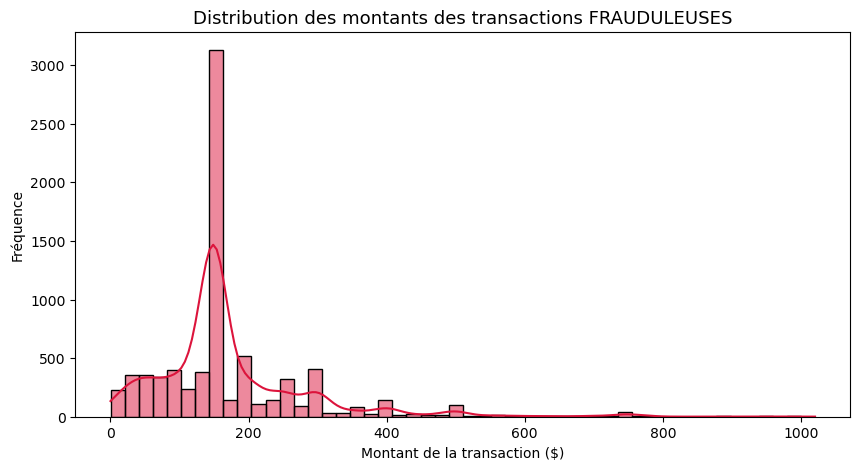

Statistiques sur les montants frauduleux :
count    7762.000000
mean      172.561364
std       116.865552
min         0.030000
25%       124.485000
50%       150.000000
75%       200.000000
max      1020.490000
Name: dollar_amt, dtype: float64


In [22]:
# Filtrer uniquement les transactions frauduleuses
fraudes = df[df['fraude'] == 1]

plt.figure(figsize=(10,5))
sns.histplot(fraudes['dollar_amt'], bins=50, kde=True, color='crimson')
plt.title("Distribution des montants des transactions FRAUDULEUSES", fontsize=13)
plt.xlabel("Montant de la transaction ($)")
plt.ylabel("Fréquence")
plt.show()

# Statistiques descriptives
print("Statistiques sur les montants frauduleux :")
print(fraudes['dollar_amt'].describe())

In [23]:
fraude_Montant = fraudes['dollar_amt'].value_counts().sort_index()
print("\n📈 Frequence Montant :")
print(fraude_Montant)


📈 Frequence Montant :
dollar_amt
0.03       3
0.04       4
0.05       3
0.06       2
0.10       1
          ..
954.28     1
954.35     1
996.70     1
999.00     1
1020.49    1
Name: count, Length: 3434, dtype: int64


# Top_5 montants les plus fréquents parmi les fraudes

Les 5 montants les plus fréquents dans les transactions frauduleuses :
dollar_amt
150.0    1903
200.0     272
300.0     205
149.0     175
250.0     142
Name: count, dtype: int64


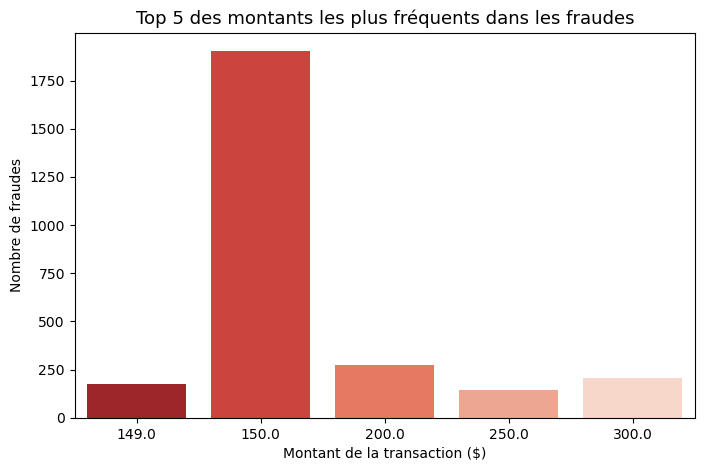

In [24]:
# 5 montants les plus fréquents dans les transactions frauduleuses
top_5_montants = fraudes['dollar_amt'].value_counts().head(5)

print("Les 5 montants les plus fréquents dans les transactions frauduleuses :")
print(top_5_montants)

# Visualisation
plt.figure(figsize=(8,5))
sns.barplot(x=top_5_montants.index, y=top_5_montants.values, palette="Reds_r")
plt.title("Top 5 des montants les plus fréquents dans les fraudes", fontsize=13)
plt.xlabel("Montant de la transaction ($)")
plt.ylabel("Nombre de fraudes")
plt.show()

# Commentaire 
L’examen des montants les plus fréquents dans les transactions frauduleuses révèle une forte concentration autour de montants ronds et moyens, principalement à 150 $, 200 $ et 300 $.

Le montant de 150 $, à lui seul, représente près d’un quart de l’ensemble des fraudes recensées (1 903 cas sur 7 762).

Cette récurrence indique une stratégie comportementale délibérée des fraudeurs :
ils privilégient des montants suffisamment faibles pour ne pas éveiller les alertes automatiques des systèmes bancaires, mais assez élevés pour rendre la fraude rentable à grande échelle.

En revanche, les montants extrêmes (très faibles ou supérieurs à 1 000 $) sont rares, ce qui corrobore l’idée que les fraudeurs cherchent à se fondre dans le comportement normal des utilisateurs légitimes.

# Comparer la distribution des montants entre transactions normales et frauduleuses

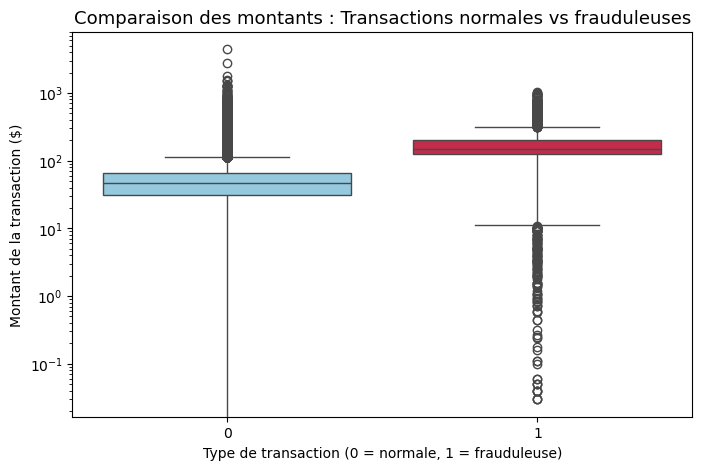

Statistiques descriptives des montants par type de transaction :
            count        mean         std      min      25%     50%     75%      max
fraude                                                                              
0       1359055.0   53.640954   42.268213 -1116.91   31.420   46.01   64.59  4413.61
1          7762.0  172.561364  116.865552     0.03  124.485  150.00  200.00  1020.49


In [25]:
plt.figure(figsize=(8,5))
sns.boxplot(x='fraude', y='dollar_amt', data=Data_card_complete, palette=['skyblue', 'crimson'])
plt.title("Comparaison des montants : Transactions normales vs frauduleuses", fontsize=13)
plt.xlabel("Type de transaction (0 = normale, 1 = frauduleuse)")
plt.ylabel("Montant de la transaction ($)")
plt.yscale('log')  # Échelle logarithmique pour mieux visualiser la dispersion
plt.show()

# Statistiques comparatives
print("Statistiques descriptives des montants par type de transaction :")
print(Data_card_complete.groupby('fraude')['dollar_amt'].describe())

# 4. Data Cleaning